In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In C:\Users\hp\Anaconda3.0\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3.0\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3.0\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hp\Anaconda3.0\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3.0\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [3]:
data = pd.read_csv('complaints.csv')

C:\Users\hp\Anaconda3.0\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,18640.0,NaN,Consent not provided,Web,2019-06-13,Closed with explanation,Yes,NaN,3274605
1,2019-11-01,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,8854.0,NaN,Consent provided,Web,2019-11-01,Closed with explanation,Yes,NaN,3425257
2,2019-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19067.0,NaN,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,NaN,3198225
3,2019-08-26,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,33194.0,NaN,NaN,Referral,2019-08-27,Closed with explanation,Yes,NaN,3355681
4,2021-02-22,Credit card or prepaid card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,On XX/XX/2019 my bill did not go through accou...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,32541.0,NaN,Consent provided,Web,2021-02-22,Closed with explanation,Yes,NaN,4157111


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372641 entries, 0 to 2372640
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 325.

### I need to sort out the  data types 

In [6]:
data.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235164
Issue                                 0
Sub-issue                        639249
Consumer complaint narrative    1543796
Company public response         1399347
Company                               0
State                             38390
ZIP code                          38604
Tags                            2084028
Consumer consent provided?       727973
Submitted via                         0
Date sent to company                  0
Company response to consumer          3
Timely response?                      0
Consumer disputed?              1604182
Complaint ID                          0
dtype: int64

<AxesSubplot:>

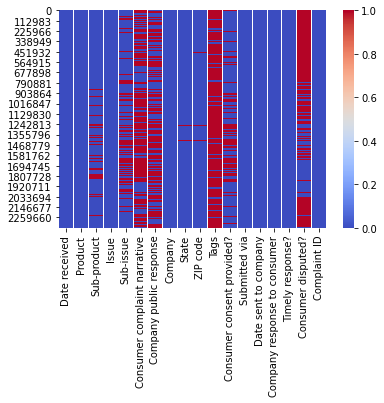

In [7]:
sns.heatmap(data.isnull(),cmap='coolwarm')

### There are alot of missing values in this dataset
### Filling the missing values when the amount of missing values is over 60 - 80%, becomes difficult to find a suitable value

In [8]:
data['Date received']

0          2019-06-13
1          2019-11-01
2          2019-04-01
3          2019-08-26
4          2021-02-22
              ...    
2372636    2017-02-09
2372637    2015-04-29
2372638    2017-03-31
2372639    2017-01-16
2372640    2018-03-07
Name: Date received, Length: 2372641, dtype: object

In [9]:
data['Date received'] = pd.to_datetime(data['Date received'])

In [10]:
data['Date received']

0         2019-06-13
1         2019-11-01
2         2019-04-01
3         2019-08-26
4         2021-02-22
             ...    
2372636   2017-02-09
2372637   2015-04-29
2372638   2017-03-31
2372639   2017-01-16
2372640   2018-03-07
Name: Date received, Length: 2372641, dtype: datetime64[ns]

In [11]:
data.Product

0          Credit reporting, credit repair services, or o...
1                                      Vehicle loan or lease
2          Credit reporting, credit repair services, or o...
3                                Checking or savings account
4                                Credit card or prepaid card
                                 ...                        
2372636                                      Debt collection
2372637                                             Mortgage
2372638                                     Credit reporting
2372639                                     Credit reporting
2372640                                             Mortgage
Name: Product, Length: 2372641, dtype: object

In [12]:
data.Product = data.Product.astype('string')

In [13]:
data.Product

0          Credit reporting, credit repair services, or o...
1                                      Vehicle loan or lease
2          Credit reporting, credit repair services, or o...
3                                Checking or savings account
4                                Credit card or prepaid card
                                 ...                        
2372636                                      Debt collection
2372637                                             Mortgage
2372638                                     Credit reporting
2372639                                     Credit reporting
2372640                                             Mortgage
Name: Product, Length: 2372641, dtype: string

In [14]:
data['Sub-product']

0                                    Credit reporting
1                                                Loan
2                                    Credit reporting
3                                    Checking account
4          General-purpose credit card or charge card
                              ...                    
2372636                                 I do not know
2372637                   Conventional fixed mortgage
2372638                                           NaN
2372639                                           NaN
2372640                        Other type of mortgage
Name: Sub-product, Length: 2372641, dtype: object

In [15]:
data['Sub-product'].value_counts()

Credit reporting                              879147
Checking account                              141947
General-purpose credit card or charge card     95951
Other mortgage                                 86635
I do not know                                  85240
                                               ...  
Credit repair                                    102
Traveler’s/Cashier’s checks                       88
Transit card                                      37
Student prepaid card                              21
Electronic Benefit Transfer / EBT card            12
Name: Sub-product, Length: 76, dtype: int64

In [17]:
data['Sub-product'].fillna("Credit reporting",inplace=True)

In [18]:
data['Sub-product'] = data['Sub-product'].astype('string')

In [19]:
data.Issue = data.Issue.astype('string')

In [20]:
data['Sub-issue'].value_counts()

Information belongs to someone else                                                 344368
Their investigation did not fix an error on your report                             126259
Account status incorrect                                                             68086
Account information incorrect                                                        64333
Debt is not yours                                                                    61626
                                                                                     ...  
Insurance terms                                                                          6
Was signed up for overdraft on card, but don't want to be                                4
Problem with a credit reporting company's investigation into an existing problem         3
Credit monitoring or identity theft protection services                                  1
Improper use of your report                                                              1

In [21]:
data['Sub-issue'] = data['Sub-issue'].fillna("Information belongs to someone else").astype('string')

In [22]:
data['Consumer complaint narrative']

0                                                        NaN
1          I contacted Ally on Friday XX/XX/XXXX after fa...
2                                                        NaN
3                                                        NaN
4          On XX/XX/2019 my bill did not go through accou...
                                 ...                        
2372636    I have disputed my debts several times with no...
2372637    My father died in XX/XX/XXXX. Left me his only...
2372638    cfbp i would Like to file a complaint on Exper...
2372639    My husband and I are in the middle of an FHA S...
2372640                                                  NaN
Name: Consumer complaint narrative, Length: 2372641, dtype: object

In [23]:
1543796/2372641 *100

65.06656506399409

### 65% of the Costumer complaint narrative is missing

In [24]:
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].fillna('Unrecorded Complaint').astype('string')

In [25]:
data['Consumer complaint narrative']

0                                       Unrecorded Complaint
1          I contacted Ally on Friday XX/XX/XXXX after fa...
2                                       Unrecorded Complaint
3                                       Unrecorded Complaint
4          On XX/XX/2019 my bill did not go through accou...
                                 ...                        
2372636    I have disputed my debts several times with no...
2372637    My father died in XX/XX/XXXX. Left me his only...
2372638    cfbp i would Like to file a complaint on Exper...
2372639    My husband and I are in the middle of an FHA S...
2372640                                 Unrecorded Complaint
Name: Consumer complaint narrative, Length: 2372641, dtype: string

In [26]:
data['Company public response']

0                                                        NaN
1          Company has responded to the consumer and the ...
2          Company has responded to the consumer and the ...
3          Company has responded to the consumer and the ...
4          Company has responded to the consumer and the ...
                                 ...                        
2372636                                                  NaN
2372637                                                  NaN
2372638    Company has responded to the consumer and the ...
2372639    Company has responded to the consumer and the ...
2372640    Company has responded to the consumer and the ...
Name: Company public response, Length: 2372641, dtype: object

In [27]:
data['Company public response'].value_counts()

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            785012
Company believes it acted appropriately as authorized by contract or law                                                    97799
Company chooses not to provide a public response                                                                            52473
Company believes the complaint is the result of a misunderstanding                                                           9460
Company disputes the facts presented in the complaint                                                                        7988
Company believes complaint caused principally by actions of third party outside the control or direction of the company      6414
Company believes complaint is the result of an isolated error                                                                5233
Company believes complaint represents an opportunity for improvement to better serve consu

In [28]:
data['Company public response'] = data['Company public response'].fillna('Company has responded to the consumer and the CFPB and chooses not to provide a public response').astype('string')

In [29]:
data.Company = data.Company.astype('string')

In [30]:
data.State

0          PA
1          NJ
2          PA
3          FL
4          FL
           ..
2372636    UT
2372637    OK
2372638    MN
2372639    GA
2372640    CA
Name: State, Length: 2372641, dtype: object

In [31]:
data.State.value_counts()

CA    305415
FL    257606
TX    222956
NY    159053
GA    137129
       ...  
AA        48
MP        37
MH        33
AS        32
PW        13
Name: State, Length: 63, dtype: int64

In [32]:
data.State = data.State.fillna('CA').astype('string')

In [33]:
data['ZIP code'].value_counts()

30349.0    1984
2301.0     1952
35405.0    1750
33025.0    1701
33311.0    1449
           ... 
4010.0        1
95323.0       1
70050.0       1
71837         1
72865.0       1
Name: ZIP code, Length: 57992, dtype: int64

In [34]:
data['ZIP code'] = data['ZIP code'].fillna(30349.0)

In [35]:
data.Tags.value_counts()

Servicemember                    154231
Older American                   109830
Older American, Servicemember     24552
Name: Tags, dtype: int64

In [36]:
data.Tags = data.Tags.fillna('Servicemember').astype('string')

In [37]:
2084028/2372641 * 100

87.83579142398703

### Approximately 88% of the tagss column is missing

In [38]:
data['Consumer consent provided?'].value_counts()

Consent provided        829193
Consent not provided    749109
Other                    62839
Consent withdrawn         3527
Name: Consumer consent provided?, dtype: int64

In [39]:
data['Consumer consent provided?'] = data['Consumer consent provided?'].fillna('Consent provided').astype('string')

In [40]:
data['Submitted via'] = data['Submitted via'].astype('category')

In [41]:
data['Date sent to company'] = data['Date sent to company'].astype('datetime64')

In [42]:
data['Company response to consumer'].value_counts()

Closed with explanation            1956269
Closed with non-monetary relief     245750
Closed with monetary relief         107279
Closed without relief                17868
Closed                               17611
In progress                          13227
Untimely response                     9330
Closed with relief                    5304
Name: Company response to consumer, dtype: int64

In [43]:
data['Company response to consumer'] = data['Company response to consumer'].fillna('Closed with explanation').astype('category')

In [44]:
data['Timely response?'] = data['Timely response?'].astype('category')

In [45]:
data['Consumer disputed?'].value_counts()

No     620081
Yes    148378
Name: Consumer disputed?, dtype: int64

In [46]:
data['Consumer disputed?'] = data['Consumer disputed?'].fillna('No').astype('category') 

In [47]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Unrecorded Complaint,Company has responded to the consumer and the ...,CAPITAL ONE FINANCIAL CORPORATION,PA,18640.0,Servicemember,Consent not provided,Web,2019-06-13,Closed with explanation,Yes,No,3274605
1,2019-11-01,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,8854.0,Servicemember,Consent provided,Web,2019-11-01,Closed with explanation,Yes,No,3425257
2,2019-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,Unrecorded Complaint,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19067.0,Servicemember,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,No,3198225
3,2019-08-26,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,Unrecorded Complaint,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,33194.0,Servicemember,Consent provided,Referral,2019-08-27,Closed with explanation,Yes,No,3355681
4,2021-02-22,Credit card or prepaid card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,On XX/XX/2019 my bill did not go through accou...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,32541.0,Servicemember,Consent provided,Web,2021-02-22,Closed with explanation,Yes,No,4157111


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372641 entries, 0 to 2372640
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       string        
 2   Sub-product                   string        
 3   Issue                         string        
 4   Sub-issue                     string        
 5   Consumer complaint narrative  string        
 6   Company public response       string        
 7   Company                       string        
 8   State                         string        
 9   ZIP code                      object        
 10  Tags                          string        
 11  Consumer consent provided?    string        
 12  Submitted via                 category      
 13  Date sent to company          datetime64[ns]
 14  Company response to consumer  category      
 15  Timely response?              ca

<AxesSubplot:>

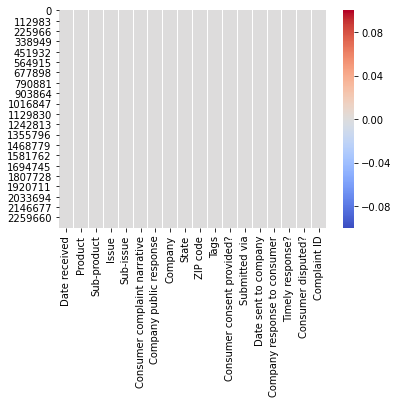

In [49]:
sns.heatmap(data.isnull(),cmap='coolwarm')

### Quick explanation and analysis of the dataset

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Closed'),
  Text(1, 0, 'Closed with explanation'),
  Text(2, 0, 'Closed with monetary relief'),
  Text(3, 0, 'Closed with non-monetary relief'),
  Text(4, 0, 'Closed with relief'),
  Text(5, 0, 'Closed without relief'),
  Text(6, 0, 'In progress'),
  Text(7, 0, 'Untimely response')])

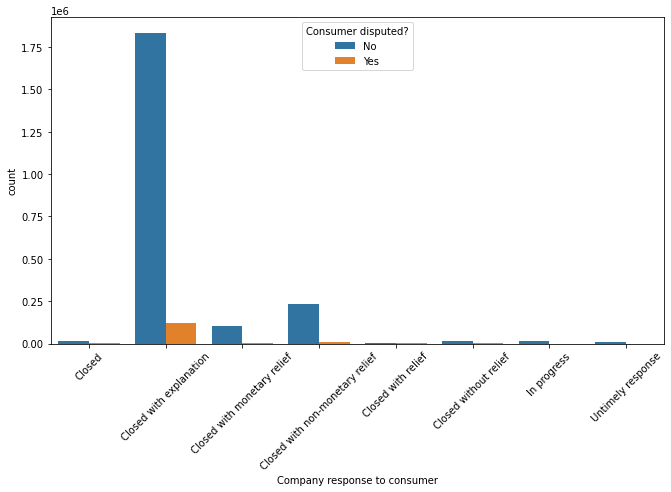

In [60]:
plt.figure(figsize=(11,6))
sns.countplot(data['Company response to consumer'],hue=data['Consumer disputed?'])
plt.xticks(rotation=45)

### Most complaint is closed with explanation. There are hardly any case of consumer dispute

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Consent not provided'),
  Text(1, 0, 'Consent provided'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Consent withdrawn')])

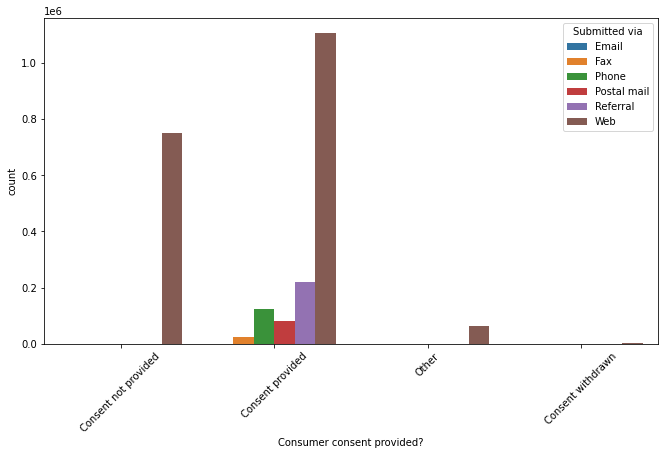

In [59]:
plt.figure(figsize=(11,6))
sns.countplot(data['Consumer consent provided?'],hue=data['Submitted via'])
plt.xticks(rotation=45) 

### Most complaint were submitted via Web and regardless of the submitted platform, Most consumer provide their consent

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Email'),
  Text(1, 0, 'Fax'),
  Text(2, 0, 'Phone'),
  Text(3, 0, 'Postal mail'),
  Text(4, 0, 'Referral'),
  Text(5, 0, 'Web')])

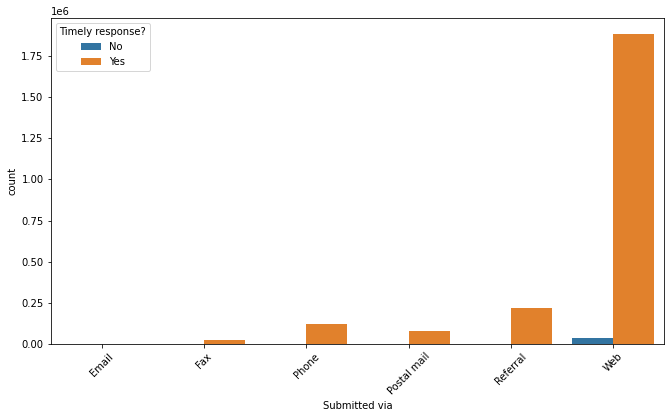

In [61]:
plt.figure(figsize=(11,6))
sns.countplot(data['Submitted via'],hue=data['Timely response?'])
plt.xticks(rotation=45) 

### There is no clear relationship between how quickly the consumers are responded to and the mode of compliant submission.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

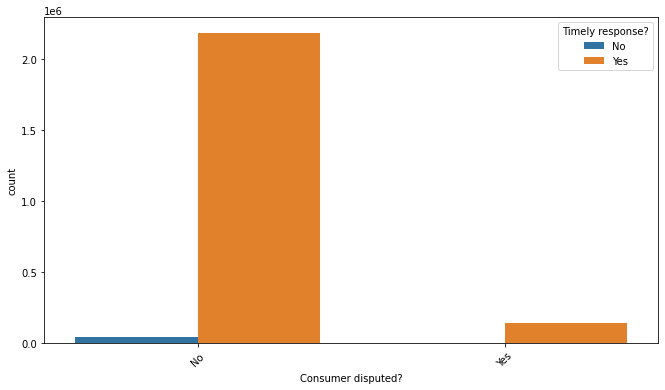

In [62]:
plt.figure(figsize=(11,6))
sns.countplot(data['Consumer disputed?'],hue=data['Timely response?'])
plt.xticks(rotation=45) 